In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

def load_and_validate_data(file_path):
    """Load and validate simulation data."""
    if not Path(file_path).exists():
        raise FileNotFoundError(f"Simulation records file not found: {file_path}")
    
    df = pd.read_csv(file_path)
    expected_columns = [
        'Day', 'inventory_quantity', 'demand_quantity', 'procurement_quantity',
        'purchase_quantity', 'sale_quantity', 'lost_sale_quantity'
    ]
    
    if not all(col in df.columns for col in expected_columns):
        raise ValueError("Missing required columns in simulation records")
    
    return df

def calculate_kpis(df):
    """Calculate key performance indicators."""
    kpis = {
        'Service Level (%)': (df['sale_quantity'].sum() / df['demand_quantity'].sum()) * 100,
        'Average Inventory': df['inventory_quantity'].mean(),
        'Total Lost Sales': df['lost_sale_quantity'].sum(),
        'Total Purchases': df['purchase_quantity'].sum(),
        'Average Daily Demand': df['demand_quantity'].mean(),
        'Total Sales': df['sale_quantity'].sum(),
        'Inventory Turns': df['sale_quantity'].sum() / df['inventory_quantity'].mean(),
        'Peak Inventory': df['inventory_quantity'].max(),
        'Minimum Inventory': df['inventory_quantity'].min()
    }
    return kpis

def plot_inventory_profile(df):
    """Plot daily inventory levels with key metrics and purchase order points."""
    plt.figure(figsize=(20, 5))
    
    # Plot inventory level
    plt.plot(df['Day'], df['inventory_quantity'], marker='o', label='Inventory Level')
    
    # Plot average inventory line
    plt.axhline(y=df['inventory_quantity'].mean(), color='r', linestyle='--', 
                label=f'Average Inventory ({df["inventory_quantity"].mean():.0f} units)')
    
    # Add vertical lines for purchase orders
    purchase_days = df[df['purchase_quantity'] > 0]['Day']
    purchase_inventories = df[df['purchase_quantity'] > 0]['inventory_quantity']
    
    for day, inv_level in zip(purchase_days, purchase_inventories):
        plt.vlines(x=day, ymin=0, ymax=inv_level, colors='g', linestyles=':', alpha=0.5)
        plt.scatter(day, inv_level, color='g', marker='v', 
                   label='Purchase Order' if day == purchase_days.iloc[0] else "")
    
    plt.title('Daily Inventory Profile with Purchase Order Points')
    plt.xlabel('Day')
    plt.ylabel('Units')
    plt.legend()
    plt.grid(True)
    # plt.savefig('inventory_profile.png')
    # plt.close()


def plot_demand_fulfillment(df):
    """Plot demand fulfillment analysis."""
    plt.figure(figsize=(20, 5))
    plt.plot(df['Day'], df['demand_quantity'], label='Demand', marker='o')
    plt.plot(df['Day'], df['sale_quantity'], label='Sales', marker='s')
    plt.plot(df['Day'], df['lost_sale_quantity'], label='Lost Sales', marker='^')
    plt.title('Daily Demand Fulfillment Analysis')
    plt.xlabel('Day')
    plt.ylabel('Units')
    plt.legend()
    plt.grid(True)
    # plt.savefig('demand_fulfillment.png')
    # plt.close()

def plot_order_pattern(df):
    """Plot ordering pattern analysis."""
    plt.figure(figsize=(20, 5))
    plt.bar(df['Day'], df['purchase_quantity'], alpha=0.5, label='Purchase Orders')
    plt.bar(df['Day'], df['procurement_quantity'], alpha=0.5, label='Received Inventory')
    plt.title('Purchase Orders and Inventory Receipt Pattern')
    plt.xlabel('Day')
    plt.ylabel('Units')
    plt.legend()
    plt.grid(True)
    # plt.savefig('order_pattern.png')
    # plt.close()

def analyze_order_pattern(df):
    """Analyze ordering patterns."""
    order_days = df[df['purchase_quantity'] > 0]['Day']
    order_intervals = order_days.diff().dropna()
    
    order_analysis = {
        'Number of Orders': len(order_days),
        'Average Order Size': df[df['purchase_quantity'] > 0]['purchase_quantity'].mean(),
        'Average Order Interval': order_intervals.mean() if not order_intervals.empty else 0,
        'Total Order Quantity': df['purchase_quantity'].sum()
    }
    return order_analysis

In [39]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load data
df = load_and_validate_data('simulation_records.csv')

# Calculate KPIs
kpis = calculate_kpis(df)
order_analysis = analyze_order_pattern(df)

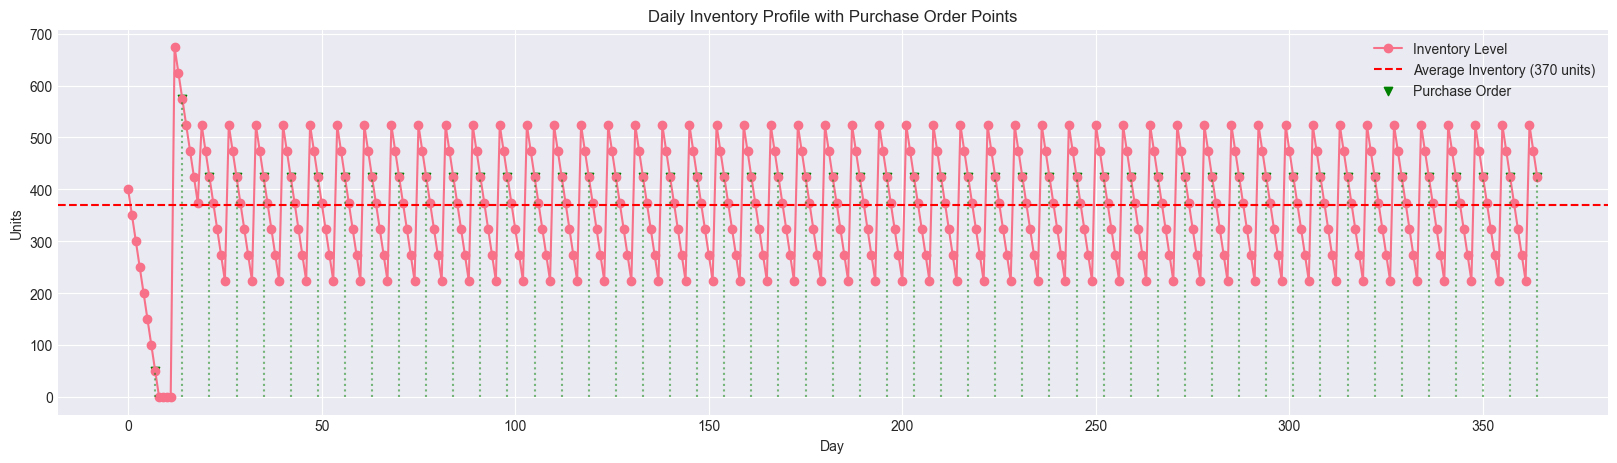

In [40]:
# Generate plots
plot_inventory_profile(df)

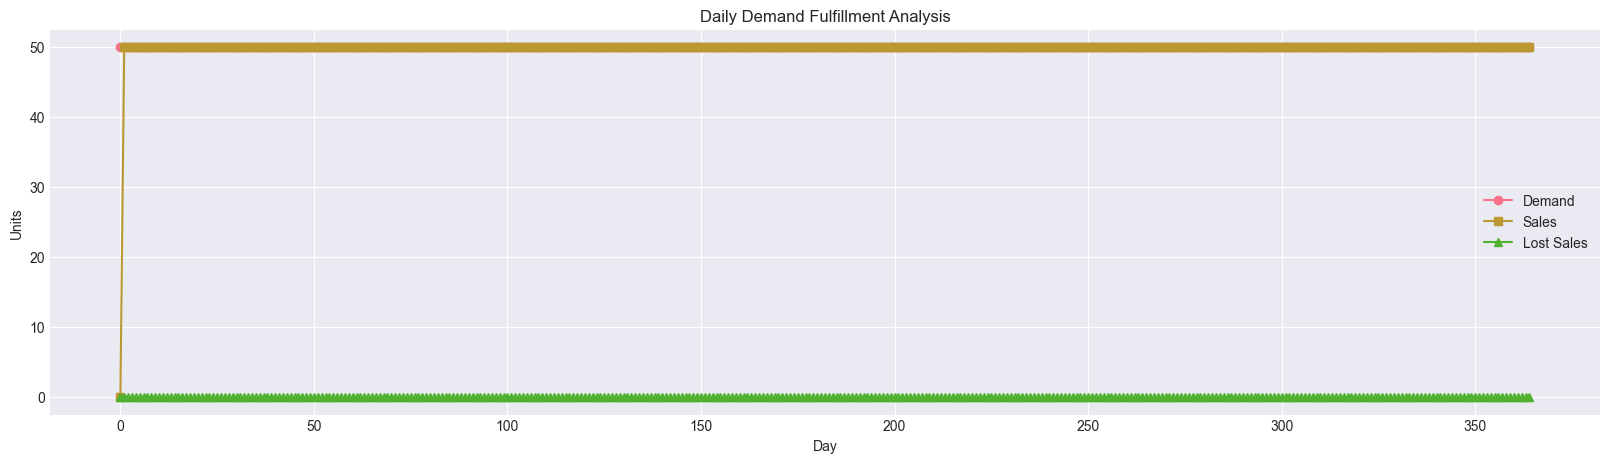

In [36]:
plot_demand_fulfillment(df)

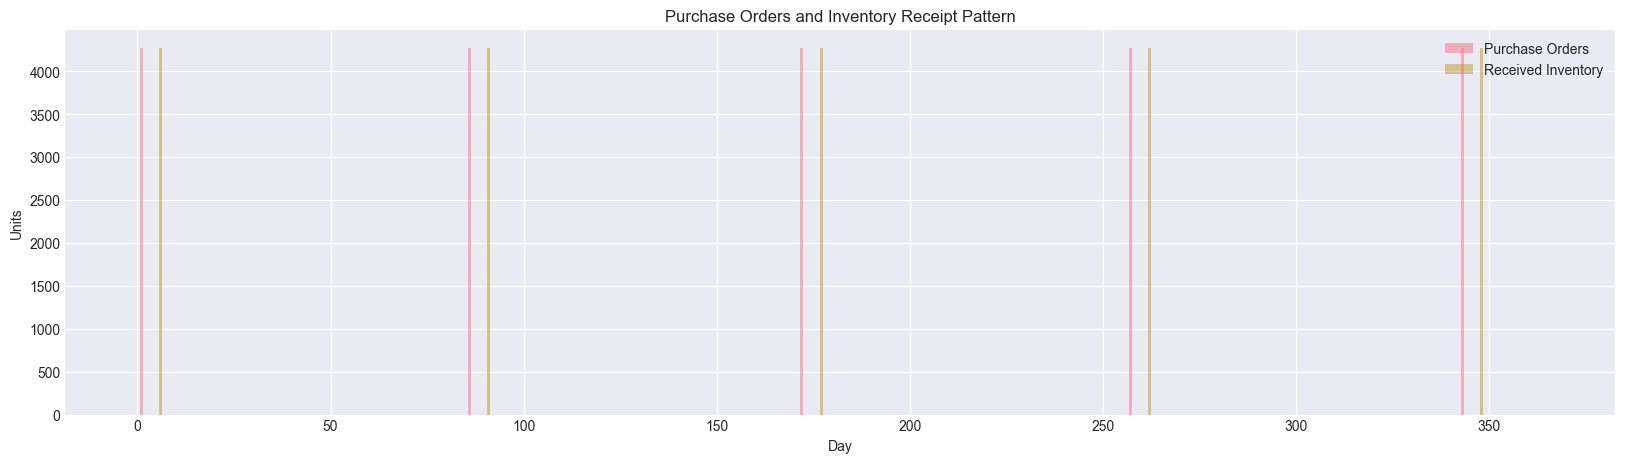

In [37]:
plot_order_pattern(df)


=== Simulation Analysis Report ===

Key Performance Indicators:
--------------------------------------------------
Service Level (%)        : 99.73
Average Inventory        : 2,316.15
Total Lost Sales         : 0.00
Total Purchases          : 21,365.00
Average Daily Demand     : 50.00
Total Sales              : 18,200.00
Inventory Turns          : 7.86
Peak Inventory           : 4,396.00
Minimum Inventory        : 142.00

Order Pattern Analysis:
--------------------------------------------------
Number of Orders         : 5.00
Average Order Size       : 4,273.00
Average Order Interval   : 85.50
Total Order Quantity     : 21,365.00

Correlation Analysis:
--------------------------------------------------
                    inventory_quantity  demand_quantity  sale_quantity  \
inventory_quantity            1.000000              NaN       0.078738   
demand_quantity                    NaN              NaN            NaN   
sale_quantity                 0.078738              NaN       1.

Text(0.5, 1.0, 'Correlation Matrix of Key Metrics')

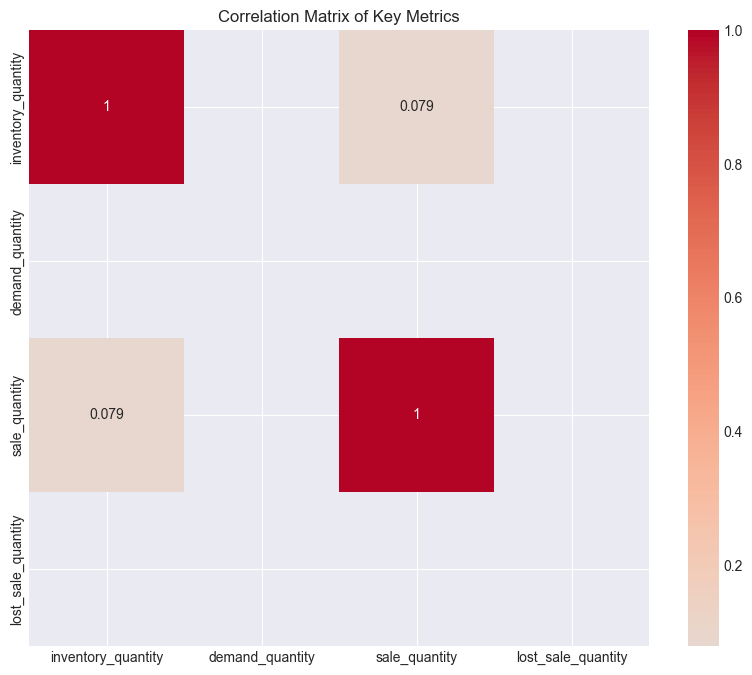

In [38]:

# Print analysis results
print("\n=== Simulation Analysis Report ===\n")

print("Key Performance Indicators:")
print("-" * 50)
for metric, value in kpis.items():
    print(f"{metric:<25}: {value:,.2f}")

print("\nOrder Pattern Analysis:")
print("-" * 50)
for metric, value in order_analysis.items():
    print(f"{metric:<25}: {value:,.2f}")

# Calculate and print correlations
print("\nCorrelation Analysis:")
print("-" * 50)
correlations = df[['inventory_quantity', 'demand_quantity', 'sale_quantity', 
                  'lost_sale_quantity']].corr()
print(correlations)

# Save correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Metrics')
# plt.savefig('correlations.png')
# plt.close()